In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_data = pd.read_csv('Data/train.csv')
test_data = pd.read_csv('Data/test.csv')
gender_submission = pd.read_csv('Data/gender_submission.csv')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Kaggle Competition: Titanic

In [2]:
#1. Inspect the data
print(train_data.head())
print(train_data.info())
#2. Get basic info on each dataset
print(train_data.info())
print(test_data.info())
#3. View descriptive statistics
print(train_data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
#Feature Engineering
# Feature 1: FamilySize (combines SibSp and Parch)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Feature 2: Title (extract title from Name)
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Feature 3: IsAlone (indicates if the passenger is traveling alone)
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

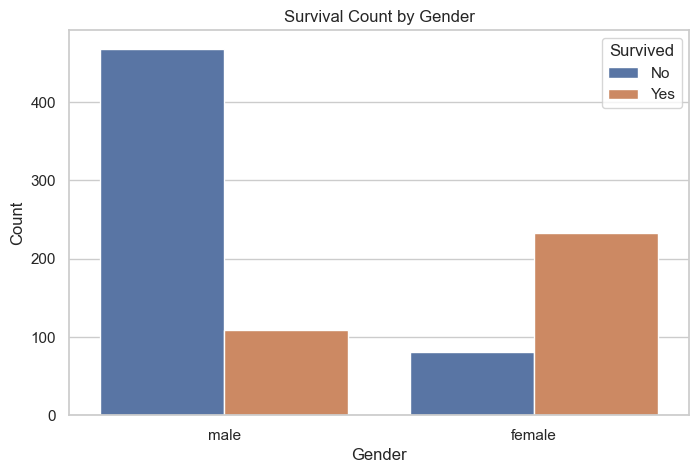

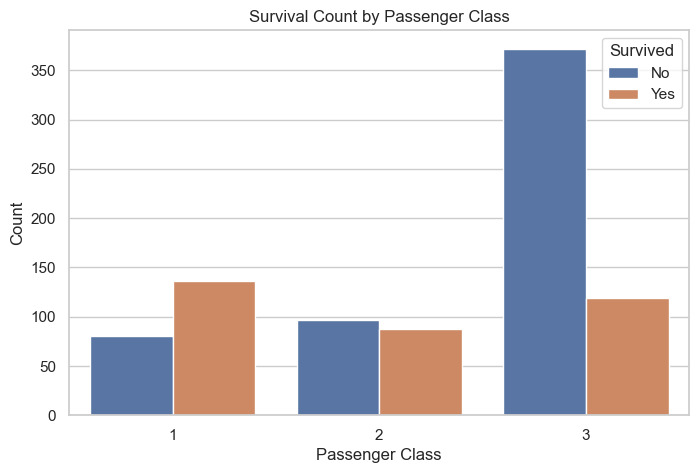

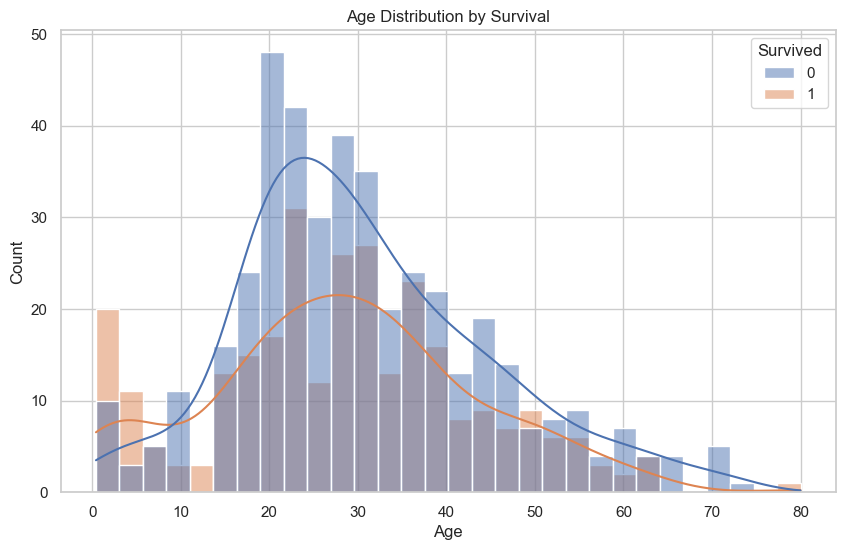

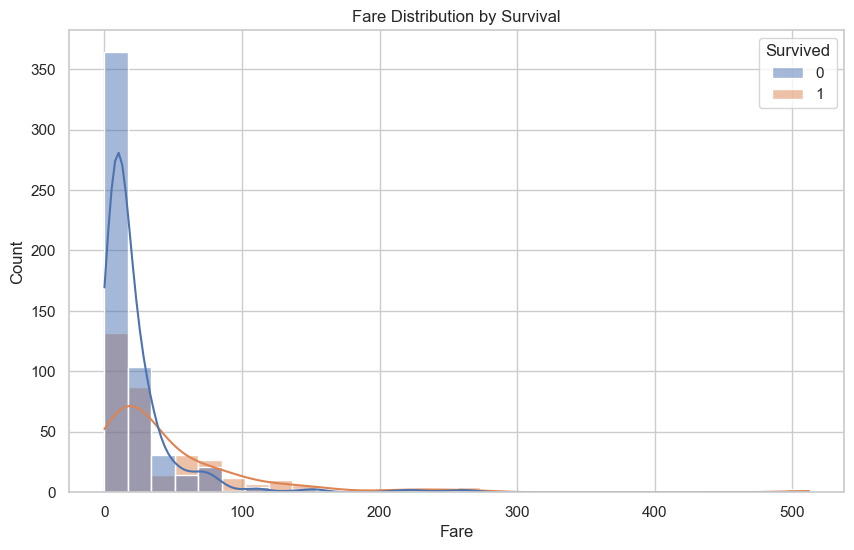

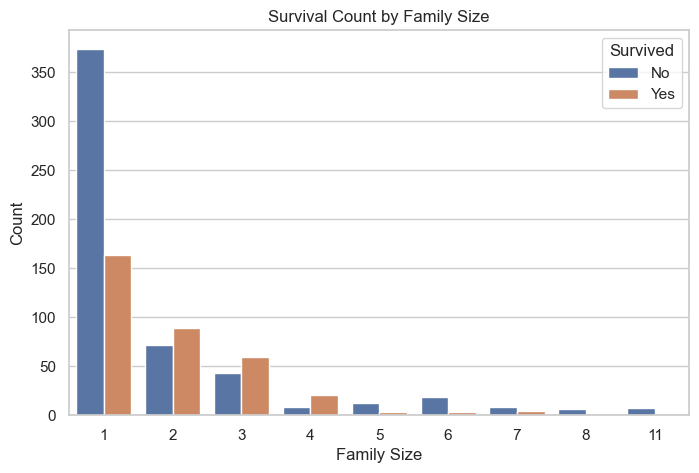

In [4]:
sns.set(style="whitegrid")

# 1. Survival Count by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# 2. Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# 3. Age Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 4. Fare Distribution by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# 5. Survival by Family Size
plt.figure(figsize=(8, 5))
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.title("Survival Count by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


In [5]:
# Handling Missing Data
# Fill missing Age with median age per Pclass/Sex group
train_data['Age'] = train_data['Age'].fillna(train_data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
test_data['Age'] = test_data['Age'].fillna(test_data.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

# Fill missing Embarked in train set with the most common value
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# Fill missing Fare in test set with median Fare
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Drop Cabin due to high missing values
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

# Confirm missing values have been handled
print("\nMissing Values After Handling:")
print(train_data.isnull().sum())
print(test_data.isnull().sum())



Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Title          0
IsAlone        0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
Title          0
IsAlone        0
dtype: int64


In [6]:
# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Title'])
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)
print("\nTrain Data After Encoding:")
print(train_data.head())
print("\nTest Data After Encoding:")
print(test_data.head())



Train Data After Encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  ...  Title_Major  Title_Master  \
0         A/5 21171   7.2500           2  ...        False         False   
1          PC 17599  71.2833           2  ...        False         False   
2  STON/O2. 3101282   7.9250           1  ...        False         Fal

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Feature & Target Variable
X = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']

# Split train data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, solver='liblinear', random_state=42)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": make_pipeline(StandardScaler(), SVC(random_state=42)),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_val)
    
    print(f"\n{model_name} Model Performance:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Logistic Regression Model Performance:
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[88 17]
 [16 58]]

Random Forest Model Performance:
Accuracy: 0.8435754189944135
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       105
           1       0.79      0.84      0.82        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.84      0.84       179

Confusion Matrix:
 [[89 16]
 [12 62]]

Support Vector Classifier Model Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

        

In [8]:
X_train_final = train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y_train_final = train_data['Survived']
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_final, y_train_final)
X_test = test_data[X_train_final.columns] 
y_test_pred = final_model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test_pred
})
submission.to_csv('submission.csv', index=False)

The objective of the Titanic project is to **predict the survival of passengers** aboard the Titanic based on various features, such as age, gender, passenger class, and other socio-demographic and ticket-related attributes. This is a classic **binary classification problem**, where the target variable (`Survived`) is either:

- `1` (indicating the passenger survived), or
- `0` (indicating the passenger did not survive).

### Specific Goals
1. **Build a Predictive Model**: Use machine learning techniques to build a model that can accurately classify whether a passenger survived or not based on the features provided.
2. **Achieve High Predictive Performance**: Optimize the model to maximize performance on relevant metrics (e.g., accuracy, F1-score, precision, recall), considering the class imbalance in the survival rate.
3. **Feature Analysis and Insights**: Analyze and interpret the significance of different features in predicting survival, helping us understand the characteristics that most likely influenced survival odds.

### Why This Project is Valuable
- **Learning Opportunity**: It provides experience with data preprocessing, feature engineering, handling missing data, and building and evaluating classification models.
- **Understanding Real-World Patterns**: By exploring survival predictors, we gain insights into factors that could have impacted survival, such as socio-economic status (ticket class), age.

### 1. **Target Variable (`Survived`)**
   - **Survival Rate**: The average `Survived` value is about **0.38**, which means around **38% of passengers survived** while **62% did not**. This class imbalance is notable and will impact model evaluation, as we need to ensure the model accurately captures survival even with fewer surviving cases.

### 2. **Noteworthy Features**
   - **Age**: The mean age is **29.1 years** with a standard deviation of **13.3**. The age range spans from a minimum of **0.42 years** to a maximum of **80 years**. The wide range and potential age-specific survival trends suggest age could be a meaningful predictor.
   - **Fare**: The `Fare` column has a significant range, from **0** to **512.33**, with a high standard deviation. This range reflects socio-economic differences between passengers, which likely impacts survival.
   - **FamilySize**: The `FamilySize` feature has been engineered from `SibSp` and `Parch`, with values ranging from **1** to **11**. Most passengers traveled alone or with one family member, but a few large family sizes (e.g., `FamilySize` of 11) could influence survival, as larger groups might face challenges during evacuation.
   - **IsAlone**: The `IsAlone` feature indicates whether a passenger was traveling alone. Around **60%** of passengers were alone, which could impact survival rates as lone passengers might find it easier to secure space on lifeboats compared to those with family members.

### 3. **Categorical Features and One-Hot Encoding**
   - **Gender**: The `Sex` column has been one-hot encoded into `Sex_male` and `Sex_female`, providing a clear binary format for this important predictor. Historically, women were prioritized in lifeboats, so `Sex` could be a strong indicator of survival.
   - **Embarked**: The `Embarked` port was also one-hot encoded. Passengers boarded from **Southampton (S)**, **Cherbourg (C)**, or **Queenstown (Q)**, and the port of embarkation could reflect socio-economic factors and survival likelihood.
   - **Title**: Titles extracted from names (e.g., `Mr`, `Mrs`, `Miss`, `Master`) add detail about social status and age, which may influence survival. Most titles appear as one-hot encoded binary columns, with rarer titles like `Capt`, `Lady`, `Don`, etc., which could have unique survival patterns.
   - **AgeGroup**: Age has been categorized into groups (e.g., `Child`, `Teen`, `Young Adult`, `Adult`, `Senior`). This allows us to examine survival by age categories, which may capture trends better than continuous age alone.

### 4. **Handling Missing Data**
   - **Cabin**: This column has a large amount of missing data (only 204 non-null values in the training set and 91 in the test set), which limits its usefulness. Dropping or converting it to a binary indicator of whether a cabin number is available could be options.
   - **Age and Fare**: Both missing values in `Age` and `Fare` were filled using grouped median values and the median fare, respectively, ensuring complete data for modeling.

### 5. **Data Consistency**
   - **Alignment of Columns**: The train and test datasets were aligned to ensure consistent columns, handling missing dummy columns with zeros in the test data. This step is crucial for model training and prediction, as models require matching input structures across datasets.

### 6. **Potential Predictive Features**
   - **Gender, Pclass, Age, and Family Size**: These features are expected to be the most predictive of survival, based on prior analysis of survival patterns.
   - **Title and Embarked**: These features add granularity to social class and boarding location, which might provide indirect indicators of survival likelihood.